In [1]:
# Some utility functions for high-order Galerkin methods
#
# UC Berkeley Math 228B, Per-Olof Persson <persson@berkeley.edu>

using LinearAlgebra
using PyPlot

In [2]:
"""
    function gauss_quad(p)

Gaussian quadrature on [-1,1] for given degree of precision `p`
"""
function gauss_quad(p)
    n = ceil((p+1)/2)
    b = 1:n-1
    b = @. b / sqrt(4*b^2 - 1)
    eval, evec = eigen(diagm(1 => b, -1 => b))
    return eval, 2*evec[1,:].^2
end

gauss_quad

In [3]:
# Compute int(x^6, x=-1..1) = 2/7
gx,gw = gauss_quad(6)
dot(gx.^6, gw) - 2/7    # Should be zero

-1.7208456881689926e-15

In [4]:
"""
    function legendre_poly(x, p)

Legendre polynomials and derivatives up to degree `p` at nodes `x`
"""
function legendre_poly(x, p)
    z = zeros(size(x))
    o = ones(size(x))
    y = hcat(o, x, repeat(z, 1, p-1))
    dy = hcat(z, o, repeat(z, 1, p-1))
    for i = 1:p-1
        @. y[:,i+2] = ((2i+1)*x*y[:,i+1] - i*y[:,i]) / (i+1)
        @. dy[:,i+2] = ((2i+1)*(x*dy[:,i+1] + y[:,i+1]) - i*dy[:,i]) / (i+1)
    end
    y, dy
end

legendre_poly

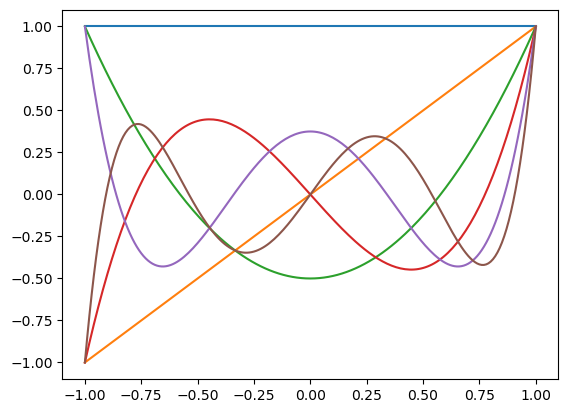

In [6]:
# Plot Legendre polynomials
xx = -1:0.01:1
yy,dyy = legendre_poly(xx, 5)
plot(xx, yy);